In [1]:
from fastai.vision.all import *

In [2]:
DATASETS_DIR = Path(os.environ['DATASETS_DIR'])/'sorghum-id-fgvc-9'
DATASETS_DIR.ls()

(#4) [Path('/datasets/sorghum-id-fgvc-9/train_cultivar_mapping.csv'),Path('/datasets/sorghum-id-fgvc-9/test'),Path('/datasets/sorghum-id-fgvc-9/train_images'),Path('/datasets/sorghum-id-fgvc-9/sample_submission.csv')]

In [3]:
(DATASETS_DIR/'train_images').ls()

(#22194) [Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-19__13-06-29-651.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-03__12-58-24-135.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-15__12-32-43-241.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-01__11-31-50-488.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-02__16-25-06-191.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-28__12-52-56-384.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-05__12-08-56-198.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-13__11-37-46-365.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-26__18-27-33-812.png'),Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-27__11-00-20-408.png')...]

In [4]:
(DATASETS_DIR/'test').ls()

(#23639) [Path('/datasets/sorghum-id-fgvc-9/test/1320211956.png'),Path('/datasets/sorghum-id-fgvc-9/test/1460752465.png'),Path('/datasets/sorghum-id-fgvc-9/test/1437601570.png'),Path('/datasets/sorghum-id-fgvc-9/test/1053653999.png'),Path('/datasets/sorghum-id-fgvc-9/test/937061344.png'),Path('/datasets/sorghum-id-fgvc-9/test/1526324826.png'),Path('/datasets/sorghum-id-fgvc-9/test/1295561477.png'),Path('/datasets/sorghum-id-fgvc-9/test/993820791.png'),Path('/datasets/sorghum-id-fgvc-9/test/1054144892.png'),Path('/datasets/sorghum-id-fgvc-9/test/1911037980.png')...]

In [5]:
!head {DATASETS_DIR/'train_cultivar_mapping.csv'}

image,cultivar
2017-06-16__12-24-20-930.png,PI_257599
2017-06-02__16-48-57-866.png,PI_154987
2017-06-12__13-18-07-707.png,PI_92270
2017-06-22__13-18-06-841.png,PI_152651
2017-06-26__12-56-48-642.png,PI_176766
2017-06-05__12-30-08-470.png,PI_156330
2017-06-18__13-23-50-617.png,PI_329299
2017-06-15__14-08-45-158.png,PI_52606
2017-06-13__10-47-59-932.png,PI_145633


In [6]:
!head {DATASETS_DIR/'sample_submission.csv'}

filename,cultivar
1000005362.png,PI_152923
1000099707.png,PI_152923
1000135300.png,PI_152923
1000136796.png,PI_152923
1000292439.png,PI_152923
1000350798.png,PI_152923
100043618.png,PI_152923
1000556805.png,PI_152923
1000673645.png,PI_152923


In [7]:
files = get_image_files(DATASETS_DIR/"train_images")
len(files)

22193

In [8]:
files[0]

Path('/datasets/sorghum-id-fgvc-9/train_images/2017-06-19__13-06-29-651.png')

In [9]:
df = pd.read_csv(DATASETS_DIR/'train_cultivar_mapping.csv')
df.head()

,image,cultivar
0,2017-06-16__12-24-20-930.png,PI_257599
1,2017-06-02__16-48-57-866.png,PI_154987
2,2017-06-12__13-18-07-707.png,PI_92270
3,2017-06-22__13-18-06-841.png,PI_152651
4,2017-06-26__12-56-48-642.png,PI_176766


In [10]:
MODEL = resnet50
BS = 8*7
RESIZE_TO = 32*20
ITEM_TFMS = RandomResizedCrop(RESIZE_TO)
BATCH_TFMS = aug_transforms()
METRICS = error_rate

In [11]:
dls = ImageDataLoaders.from_df(df, 
                               DATASETS_DIR/'train_images',
                               bs = BS,
                               item_tfms=ITEM_TFMS,
                               batch_tfms=BATCH_TFMS)

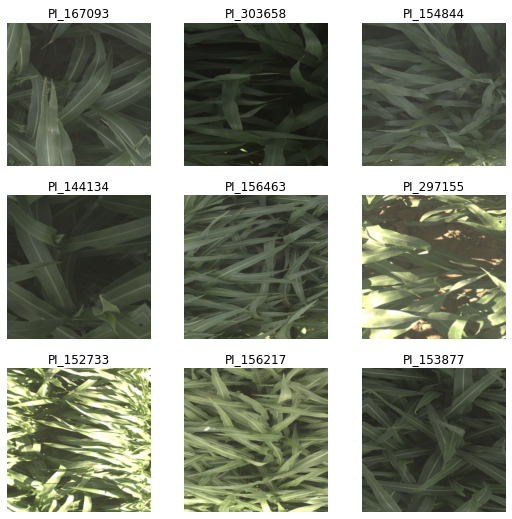

In [12]:
dls.show_batch()

In [13]:
learn = vision_learner(dls, MODEL, metrics=METRICS).to_fp16()

In [14]:
learn.unfreeze()

SuggestedLRs(valley=0.0012022644514217973)

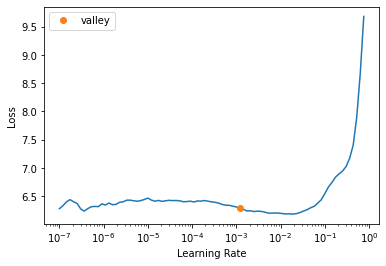

In [15]:
learn.lr_find()

In [16]:
learn.fit_one_cycle(50, lr_max=slice(5e-4, 3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,3.734898,2.316109,0.608833,04:56
1,2.207355,1.512150,0.422262,04:56
2,1.569445,1.755820,0.481749,04:56
3,1.392702,1.253263,0.374493,04:56
4,1.282523,1.050019,0.308472,04:56
5,1.262715,3.001651,0.632267,04:55
6,1.199064,1.774715,0.463948,04:55
7,1.168557,1.004869,0.310951,04:55
8,1.061041,2.201925,0.528842,04:55
9,0.952364,0.740348,0.234114,04:59


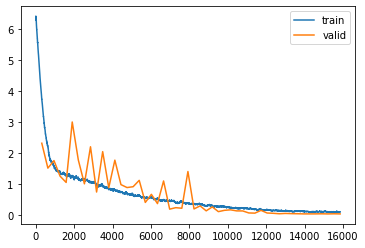

In [17]:
learn.recorder.plot_loss()

SuggestedLRs(valley=3.981071586167673e-06)

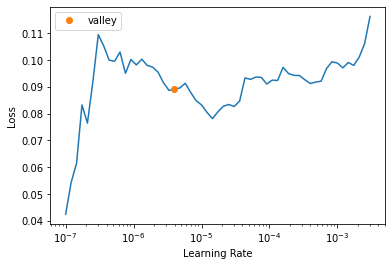

In [21]:
learn.lr_find()

In [22]:
learn.fit_one_cycle(20, lr_max=slice(1e-6, 5e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.091042,0.030796,0.010140,04:58
1,0.092812,0.031715,0.011041,05:22
2,0.098899,0.033757,0.012618,05:10
3,0.100687,0.034669,0.012844,05:06
4,0.113524,0.033785,0.012393,05:06
5,0.111580,0.035254,0.012393,05:04
6,0.095049,0.032358,0.011492,04:58
7,0.109628,0.034597,0.012618,04:58
8,0.095390,0.034903,0.012168,04:59
9,0.094290,0.033219,0.011942,04:58


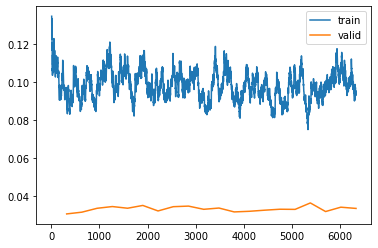

In [23]:
learn.recorder.plot_loss()

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(20, lr_max=slice(2e-5, 2e-4))

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(20, lr_max=slice(5e-5, 3e-4))

In [ ]:
learn.save()

In [25]:
learn.save("resnet50_e012618")

Path('/datasets/sorghum-id-fgvc-9/train_images/models/resnet50_e012618.pth')

In [27]:
test_files = get_image_files(DATASETS_DIR/"test")
len(test_files)

23639

In [28]:
test_dl = learn.dls.test_dl(test_files)

In [29]:
test_files

(#23639) [Path('/datasets/sorghum-id-fgvc-9/test/1320211956.png'),Path('/datasets/sorghum-id-fgvc-9/test/1460752465.png'),Path('/datasets/sorghum-id-fgvc-9/test/1437601570.png'),Path('/datasets/sorghum-id-fgvc-9/test/1053653999.png'),Path('/datasets/sorghum-id-fgvc-9/test/937061344.png'),Path('/datasets/sorghum-id-fgvc-9/test/1526324826.png'),Path('/datasets/sorghum-id-fgvc-9/test/1295561477.png'),Path('/datasets/sorghum-id-fgvc-9/test/993820791.png'),Path('/datasets/sorghum-id-fgvc-9/test/1054144892.png'),Path('/datasets/sorghum-id-fgvc-9/test/1911037980.png')...]

In [30]:
tta_preds, _ = learn.tta(dl=test_dl, n=10)

In [31]:
decoded = tta_preds.argmax(dim=1)

In [32]:
learn.dls.vocab[decoded]

(#23639) ['PI_180348','PI_22913','PI_302252','PI_152733','PI_63715','PI_144134','PI_145619','PI_152961','PI_181080','PI_154987'...]

In [33]:
fieldnames = ['filename', 'cultivar']
predictions = [{'filename': f.name, 'cultivar': c} 
               for f,c in zip(test_files, learn.dls.vocab[decoded])]

In [34]:
import csv
  
with open('predictions.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = fieldnames)
    writer.writeheader()
    writer.writerows(predictions)